In [1]:
###Import
import sys

#import geobayes_simple as gs
from matplotlib import pyplot as plt
from IPython.core.display import Image

%matplotlib inline
import pymc as pm
from pymc.Matplot import plot
import numpy as np
from IPython.core.pylabtools import figsize
figsize(15, 6)
import seaborn
seaborn.set_context(font_scale=2)
seaborn.set_style("white")

from pymc import graph

import scipy.optimize as sop
import scipy.stats as stats
import matplotlib.mlab as mlab

from scipy.signal import argrelextrema

In [2]:
fault_block = np.load('block_faults.npy') #1=hanging wall; 0=footwall
lith_block = np.load('block_lith.npy')
non_res = np.load('Non_res.npy')
res = np.load('res.npy')
#res = np.load('res.npy').astype(int)
seal = np.load('seal.npy')
res2 = np.load('sec_res.npy')

In [3]:
mini = argrelextrema(res[:,2], np.less, order=10)

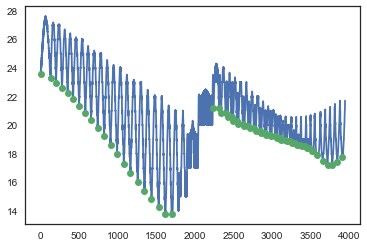

In [4]:
%matplotlib inline
plt.plot(res[:,2])
plt.plot( mini[0], np.take(res[:,2], mini[0]), 'o');

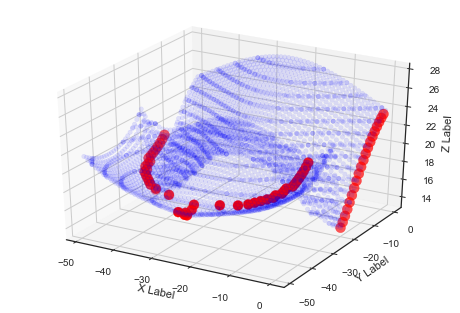

In [5]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(-res[:,1], -res[:,0], res[:,2], c="b", alpha = 0.1)
ax.scatter(-np.take(res[:,1], mini[0]), -np.take(res[:,0], mini[0]), np.take(res[:,2], mini[0]), c='r', s = 100)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [6]:
#next: mask out points on irrelevant side of fault
minima = np.array(list(zip(np.take(res[:,1], mini[0]), np.take(res[:,0], mini[0]), np.take(res[:,2], mini[0]))))
fault_thresh = minima[:,1] > 18 #taking only relevant side by setting a threshold visually estimated, best: 20
min_corr_side = minima[fault_thresh]

In [7]:
spill_pos = np.array(np.argmax(min_corr_side[:,2]))
#spill_pos2 = argrelextrema(min_corr_side[:,2], np.greater, order=10)
spill_point = np.take(min_corr_side[:,2], spill_pos)

spill_p = np.array([np.take(min_corr_side[:,1], spill_pos), np.take(min_corr_side[:,0], spill_pos), np.take(min_corr_side[:,2], spill_pos)])
#spill_p2 = np.take(min_corr_side[:,1], spill_pos2), np.take(min_corr_side[:,0], spill_pos2), np.take(min_corr_side[:,2], spill_pos2)
spill_p

array([ 25.       ,  43.       ,  21.1641978])

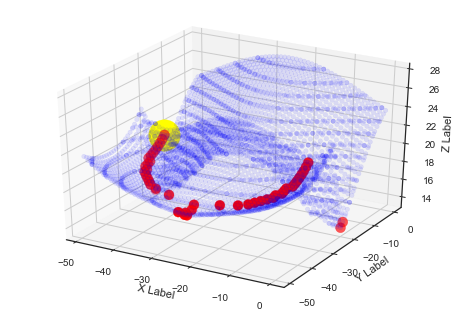

In [8]:
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(-res[:,1], -res[:,0], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
#ax.scatter(-non_res[:,1], -non_res[:,0], non_res[:,2], c='g')
ax.scatter(-min_corr_side[:,0], -min_corr_side[:,1], min_corr_side[:,2], c='r', s = 100)
ax.scatter(-spill_p[1], -spill_p[0], spill_p[2], c='yellow', s = 1000)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

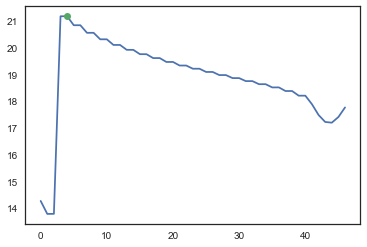

In [9]:
%matplotlib inline
plt.plot(min_corr_side[:,2])
plt.plot( spill_pos, np.take(min_corr_side[:,2],spill_pos), 'o');

In [10]:
spill_z = spill_p[2]
spill_z

21.164197799910983

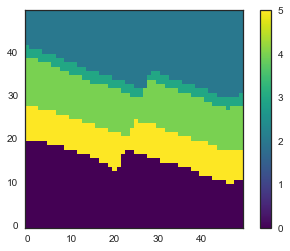

In [11]:
plt.imshow(lith_block.reshape(50,50,50)[:,25,:].T, origin='lower', cmap='viridis')
plt.colorbar();

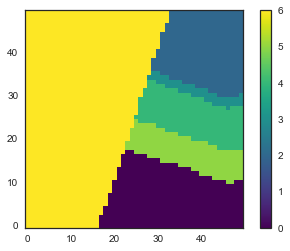

In [12]:
#masking away hanging wall (irrelevant side of faul)
lith_block[fault_block.astype(bool)] = 6
lith_block2 = lith_block.reshape(50,50,50)
plt.imshow(lith_block2[:,25,:].T, origin='lower', cmap='viridis')
plt.colorbar();

C:\Users\Fabian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  


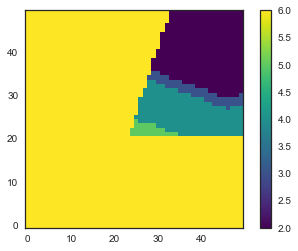

In [13]:
lith_block3 = lith_block2
lith_block3[:,:,:spill_z] = 6
plt.imshow(lith_block2[:,25,:].T, origin='lower', cmap='viridis')
plt.colorbar();

In [14]:
lith_block3 = lith_block2.reshape(125000,)

In [15]:
#counting number of reservoir cells and setting others to "6"
vol_cells = 0
for i in range(lith_block3.shape[0]):
    if lith_block3[i] != 5:
        lith_block3[i] = 6
    else:
        vol_cells += 1
        
print(vol_cells)

610


In [17]:
res_vol = ((2000/50)**3) * vol_cells#reservoir volume down to spill point, scaling back from a 50x50x50
                               #to a grid of 2000mx2000mx2000m (volume per cell * number of cells) 
print(res_vol)

39040000.0


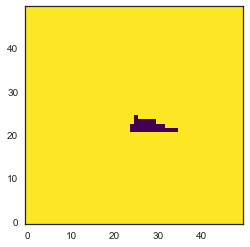

In [18]:
plt.imshow(lith_block3.reshape(50,50,50)[:,25,:].T, origin='lower', cmap='viridis');